# Cardio Good Fitness Project

## Background

Cardio Good Fitness is a retail store selling treadmill machines. Some Products are highly used while some are low on sales. Customers of various age groups and income levels use these machines. Insights on which product is preferred and by whom needs to be analysed. 

## Objective 
Preliminary Data Analysis.To explore the dataset and practice extracting basic observations about the data.
* Come up with a customer profile (characteristics of a customer) of the different products.
* Perform univariate and multivariate analyses.
* Generate a set of insights and recommendations that will help the company in targeting new customers.

## Key questions
* Which is the most bought product?
* Which product is easier to use?
* Why is the least sold product not preferred by users?


## Data description

* Product - the model no. of the treadmill
* Age - in no of years, of the customer
* Gender - of the customer
* Education - in no. of years, of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer
* Miles- expected to run

### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot

In [2]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from tabulate import tabulate
from simple_colors import *

# Libraries to help with data visualization
import seaborn as sns
from matplotlib import pyplot as plt

### Load the dataset

In [4]:
data1=pd.read_csv("CardioGoodFitness.csv")

In [5]:
# copying data to another varaible to avoid any changes to original data
data=data1 

In [6]:
# looking at head (5 observations) 
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Observations**
* The variables Product, Gender and MaritalStatus are categorical variables.

### Check the shape of the dataset

### Check the shape of the dataset

In [7]:
data.shape

(180, 9)

There are 180 rows and 9 columns

### Checking columns

In [16]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### Checking datatypes of all columns

In [8]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

### Check the info()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations**
* All column have 180 observations.
* Product, Gender and MaritalStatus should be  categorical variables.

### <font size="6"> Data Processing </font>

### Fixing the datatypes

In [15]:
# Categorical column should be converted to categorical type 
# (It reduces the data space required to store the dataframe, 
# every class in the categorical column will be represented by a number under the hood.
# This is useful during model building)

data["Product"] = data.Product.astype('category')
data["Gender"] = data.Gender.astype('category')
data["MaritalStatus"] = data.MaritalStatus.astype('category')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


 * There are 3 categorical variables and 6 integer variables.

### Summary of data

In [5]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


* There is a huge difference between the 3rd quartile and the maximum value for Income indicating there might be outliers to the right. 

### By default the describe() function shows only the summary of numeric variables only. Let's check the summary of non-numeric variables.

In [23]:
data.describe(exclude='number')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


In [61]:
print(black("Observations:\n",'bold'))
print('Most popular Product is' ,data["Product"].mode()[0], '{:.1f}'.format(100*data["Product"].value_counts().max()/data["Product"].count()), '%')
print('{:.1f}'.format(100*data["Gender"].value_counts().max()/data["Gender"].count()), '% of buyers are',data["Gender"].mode()[0])
print('{:.1f}'.format(100*data["MaritalStatus"].value_counts().max()/data["MaritalStatus"].count()),'% of buyers are',data["MaritalStatus"].mode()[0])


Observations:

Most popular Product is TM195 44.4 %
57.8 % of buyers are Male
59.4 % of buyers are Partnered


### Check for missing values

In [3]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No values are missing

# EDA

## Central tendency and Dispersion

#### Central tendency of a variable is a single value to represent the whole list. There are 3 kinds: Mean, Median and Mode

In [9]:
data.mean()

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

Mean is the arithmetic average of all observations.

In [11]:
data.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

Median is the middle most value in the list after arranging it is ascending order.

In [10]:
data.mode()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,25,Male,16,Partnered,3,3,45480,85


Mode is the observation(s) with highest frequency. There can be more than 1 mode to a variable. Here each variable has only 1 mode.

## Dispersion

#### Dispersion shows how the data is spread. It is measured by Range and IQR

* Range of a variable is the maximum value - minimum value.
* IQR is computed on the middle 50% of observations after eliminating highest and lowest 25%. It is less affected by outliers. 

In [66]:
agerange=data["Age"].max()-data["Age"].min()
edurange=data["Education"].max()-data["Education"].min()
usagerange=data["Usage"].max()-data["Usage"].min()
fitrange=data["Fitness"].max()-data["Fitness"].min()
incomerange=data["Income"].max()-data["Income"].min()
milesrange=data["Miles"].max()-data["Miles"].min()

iqrage=data["Age"].quantile(q=0.75)-data["Age"].quantile(q=0.25)
iqredu=data["Education"].quantile(q=0.75)-data["Education"].quantile(q=0.25)
iqrusage=data["Usage"].quantile(q=0.75)-data["Usage"].quantile(q=0.25)
iqrfit=data["Fitness"].quantile(q=0.75)-data["Fitness"].quantile(q=0.25)
iqrincome=data["Income"].quantile(q=0.75)-data["Income"].quantile(q=0.25)
iqrmiles=data["Miles"].quantile(q=0.75)-data["Miles"].quantile(q=0.25)


rangelist=[agerange,edurange,usagerange,fitrange,incomerange,milesrange]
iqrlist=[iqrage,iqredu,iqrusage,iqrfit,iqrincome,iqrmiles]



index=["Range","IQR"]
print(tabulate([rangelist, iqrlist], headers=['Age', 'Education','Usage','Fitness','Income','Miles'],showindex=index))

         Age    Education    Usage    Fitness    Income    Miles
-----  -----  -----------  -------  ---------  --------  -------
Range     32            9        5          4   75019     339
IQR        9            2        1          1   14609.2    48.75


### Univariate analysis of numerical variables

In [29]:
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    ax_hist2.axvline(feature.mode()[0], color='Orange', linestyle='-.') # Add mode to histogram

### Age

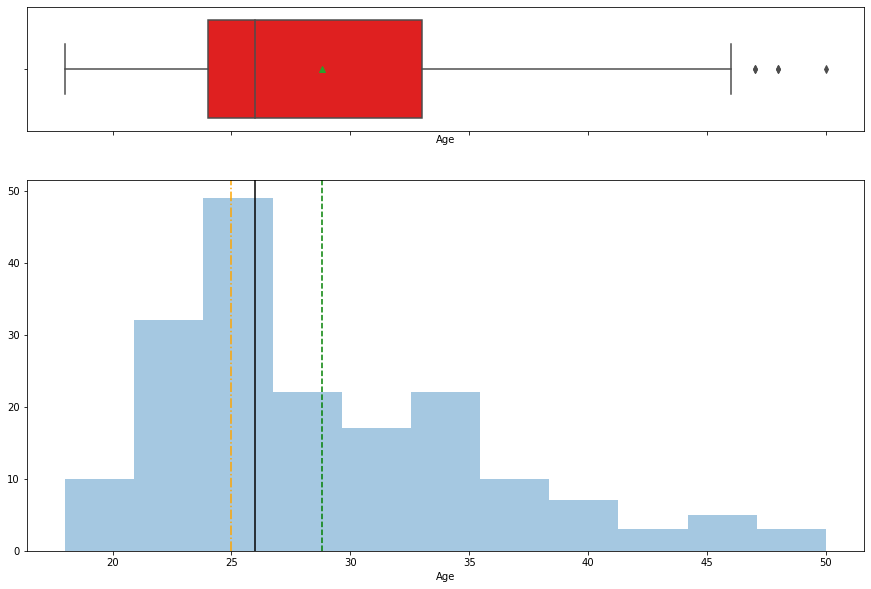

In [133]:
histogram_boxplot(data["Age"])

**Observations**
* User ages are slightly right skewed ( positive ).
* There are few outliers.
* Mean, median and mode are between 25 and 30.

### Education

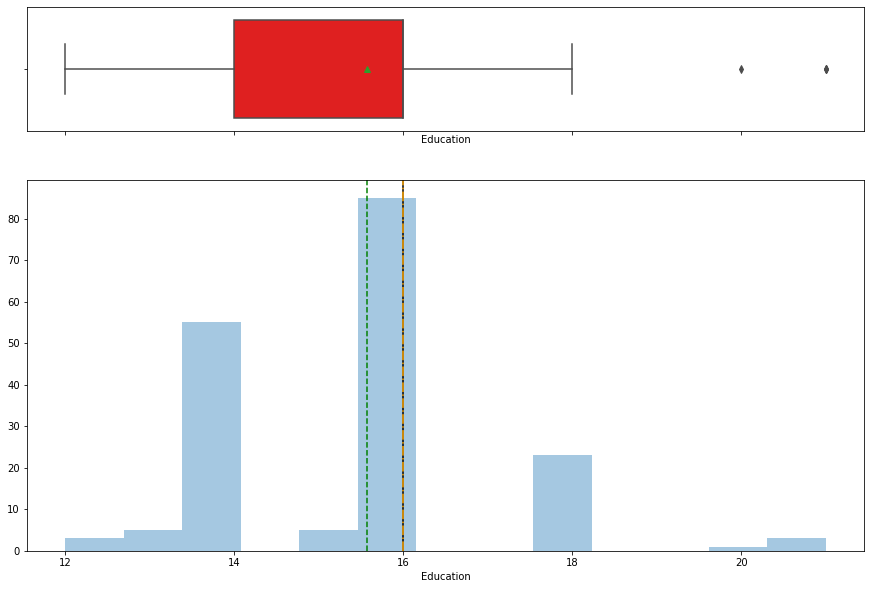

In [124]:
histogram_boxplot(data["Education"])

**Observations**
* Education has normal distribution.
* Mean is very close to level 16 and median and mode are also at level 16.

### Usage

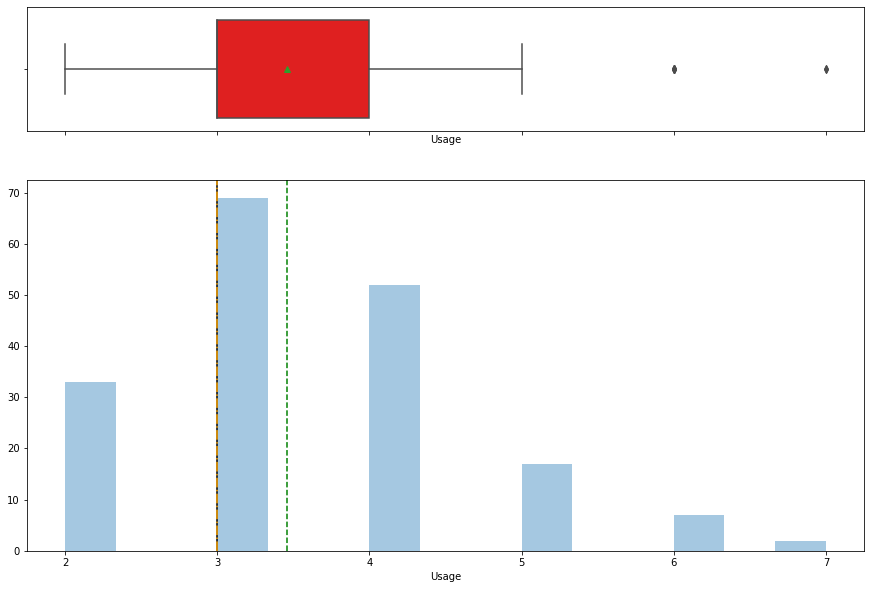

In [125]:
histogram_boxplot(data["Usage"])

**Observations**
* Very few outliers.
* Mean is close to 3 and median and mode are also 3 which means majority of the users' usage is not very high.

### Fitness

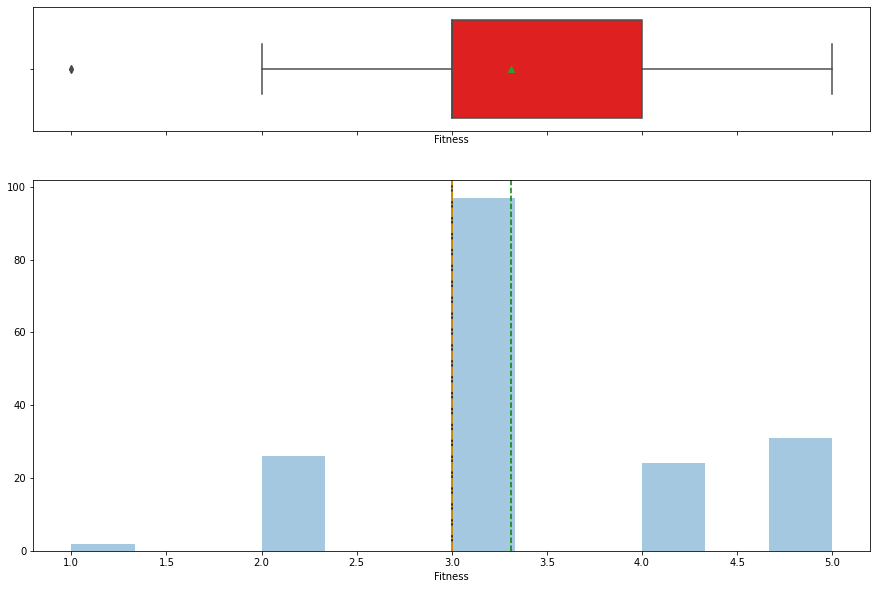

In [126]:
histogram_boxplot(data["Fitness"])

**Observations**
* Mean, median and mode are all of level 3. 

### Income

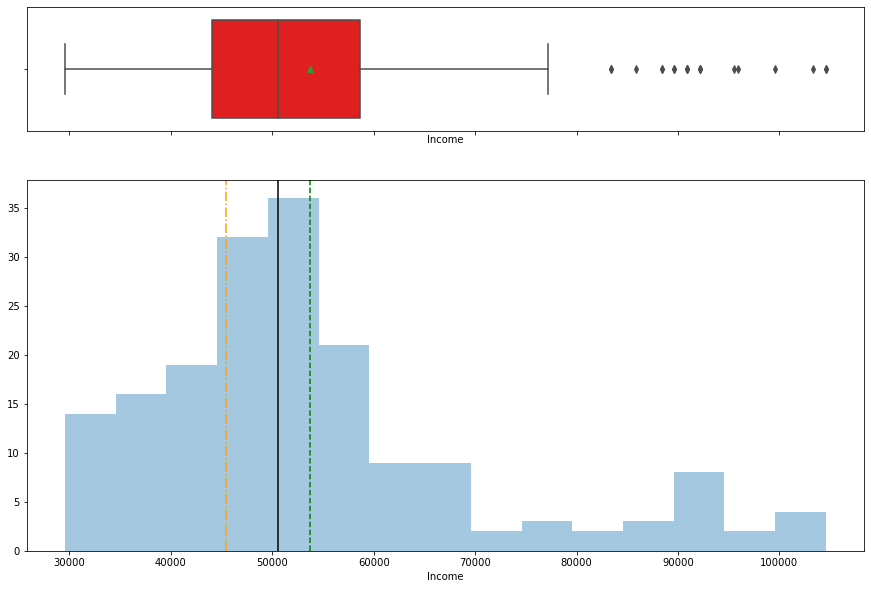

In [127]:
histogram_boxplot(data["Income"])

**Observations**
* Many outliers of users who have income above 70,000.
* Average income of users is around 50,000.
* Positive skewness.

### Miles

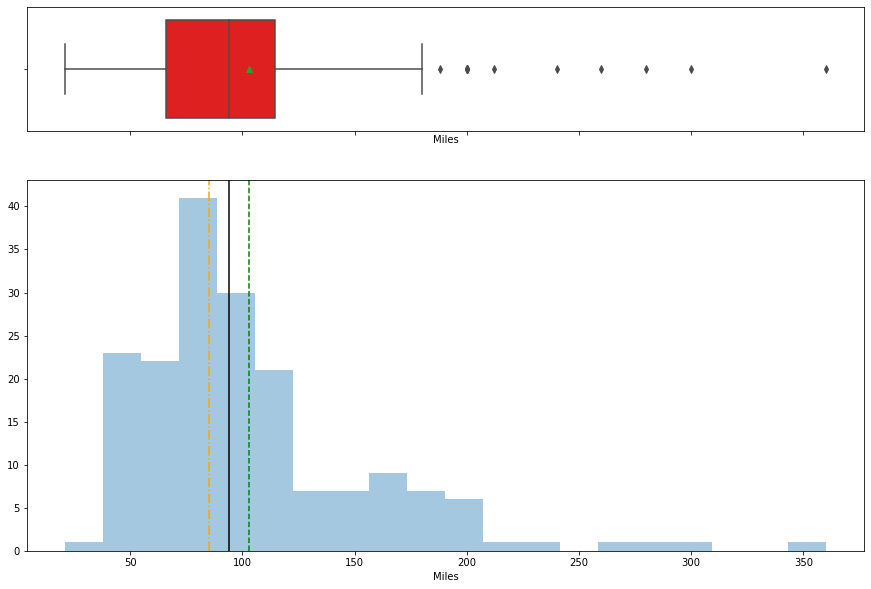

In [30]:
histogram_boxplot(data["Miles"])

**Observations**
* Very few outliers.
* Positive skewness.
* Usage also has very few outliers, so it looks like they are dependent on each other.

### Univariate analysis on categorical variables

### Product

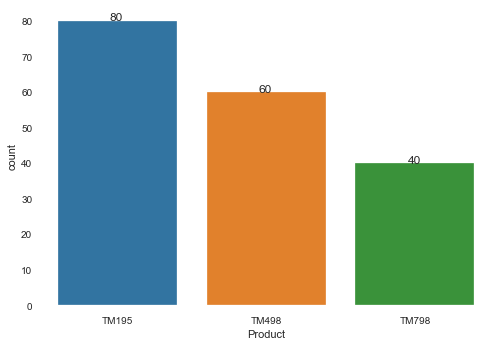

In [46]:
ax=sns.countplot(data["Product"])
total = len(data["Product"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate(p.get_height(), (x, y), size = 12) # annotate the percantage

**Observations**
* There are 3 kinds of products.
* TM195 is the most bought and TM798 is the least bought.

### Gender

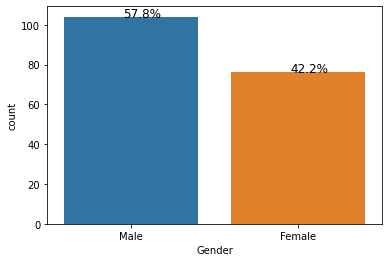

In [137]:
ax=sns.countplot(data["Gender"])
total = len(data["Gender"]) # length of the column
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

**Observations**
* There are more male users than female users.

### Marital Status

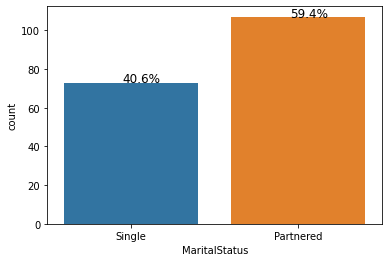

In [138]:
ax=sns.countplot(data["MaritalStatus"])
total = len(data["MaritalStatus"]) # length of the column
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

**Observations**
* 59.4% of users are Partnered.

### Bivariate analysis

#### To see how variables depend on each other

In [8]:
data.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [9]:
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

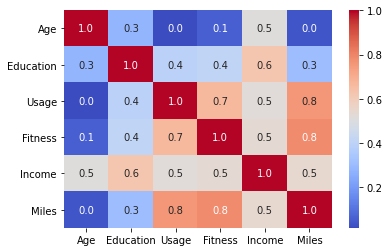

In [21]:
sns.heatmap(data.corr(),  annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=data.corr().columns,
        yticklabels=data.corr().columns)

**Observations**
* Miles, Usage and fitness have high correlation with each other -> as Usage increases, Miles and Fitness should increase.
* Education and Income also have a slightly high correlation. With higher education levels, income should be more.


In [11]:
data.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

Income and Miles are high and positively skewed.

### Bivariate scatter plots

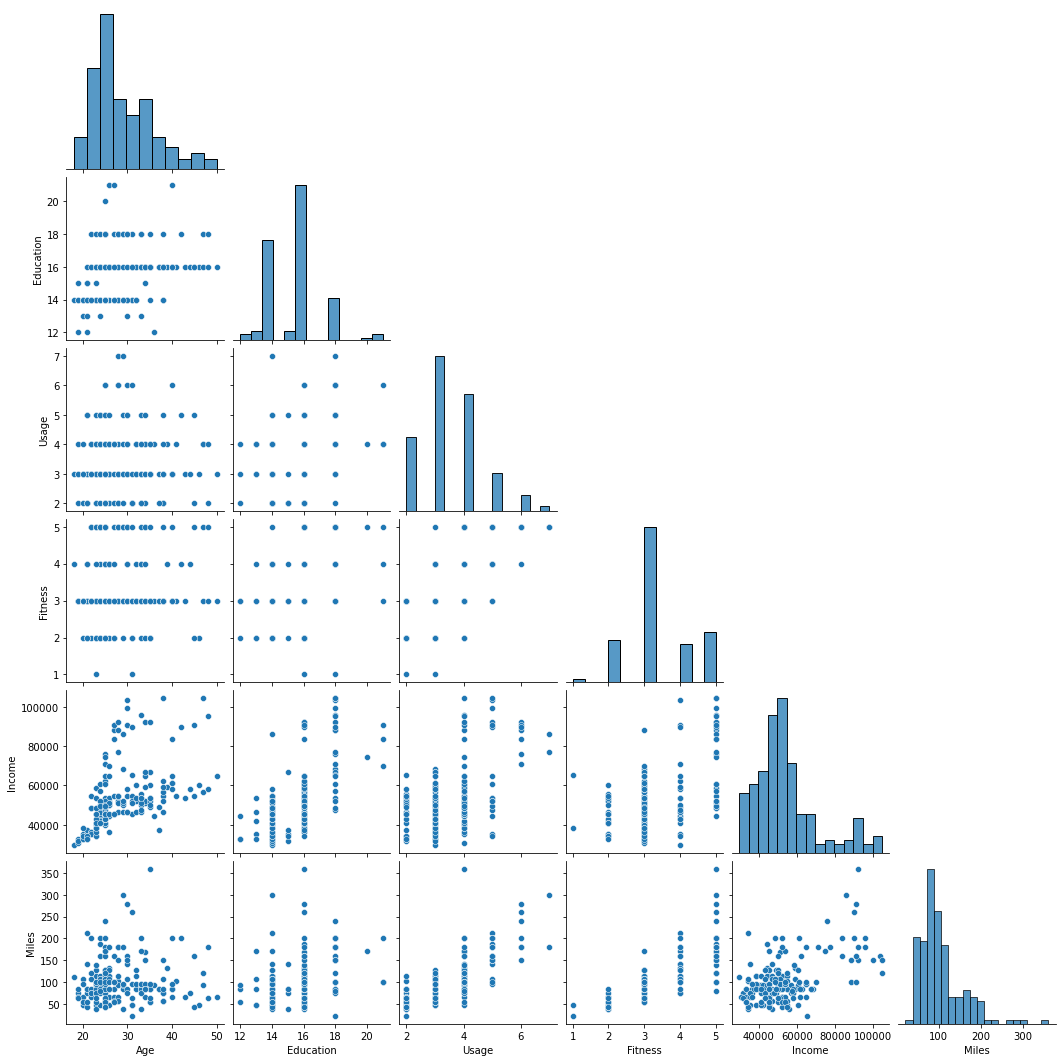

In [12]:
sns.pairplot(data,corner=True)


* Linear relationship can be seen in Usage vs Miles and Fitness vs Miles.

## Multivariate Analysis

To see how variables affect other variables based on more factors

### Gender vs Product

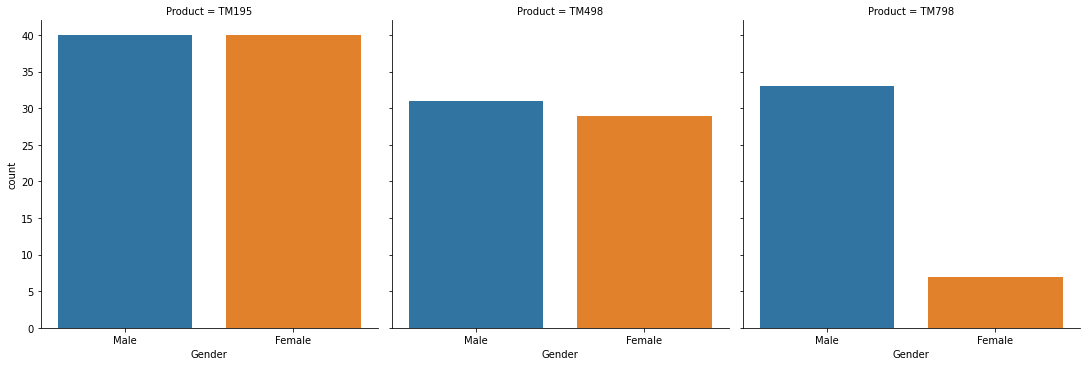

In [25]:
sns.catplot(x="Gender",col="Product",data=data,kind="count")

**Observations**
* There are almost equal number of male and female users for TM195.
* There are almost equal number of users for TM498.
* There are more male users and very few female users for TM798.

### Usage of Products

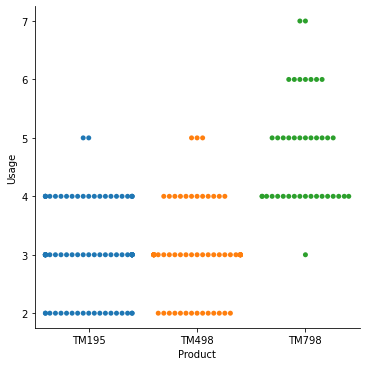

In [16]:
sns.catplot(y="Usage",x="Product",data=data, kind='swarm')

**Observations**
* Higher usage is seen in TM798.
* Usage is below 5 for TM195 and TM498.
* This implies that TM798 is easier to use while TM195 and TM498 are difficult to use.

### Fitness vs Usage



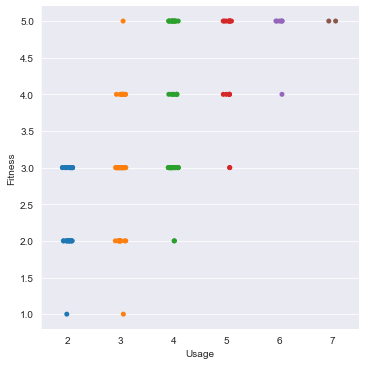

In [34]:
sns.catplot(x="Usage",y="Fitness",data=data, kind="strip")

**Observation**
* As usage increases, fitness increases

### Variability of Fitness while using different Products

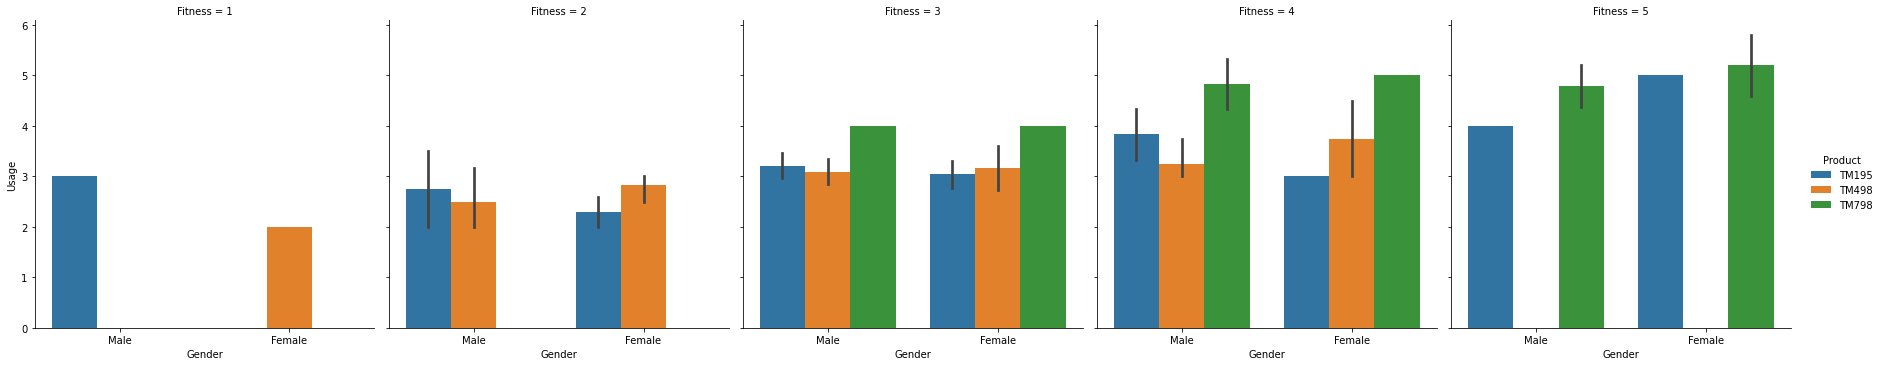

In [74]:
sns.catplot(x="Gender",y="Usage",hue="Product",col="Fitness",data=data,kind="bar")

**Observations**
* Fitness is low when the usage is low.
* Across all Fitness levels, for both genders, usage of TM798 is more.
* At the highest fitness level, TM498 is not used at all. TM798 is  used the most.
* This implies that TM798 is easier to use and to be more fit.

### Usage by Age

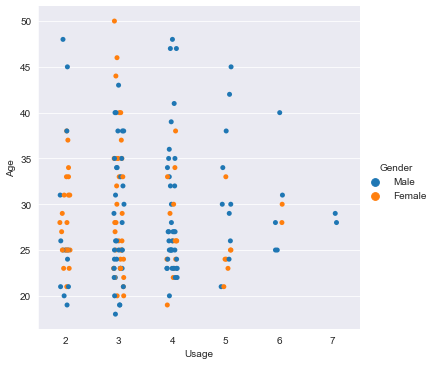

In [26]:
sns.set_style("darkgrid")
sns.catplot(x="Usage",y="Age",data=data, kind="strip", hue="Gender")

**Observations**
* Most of the users are below age 40.
* Above age 40 there are only 3 female users.
* Usage is higher in ages below 35.

### Usage of Products by Age

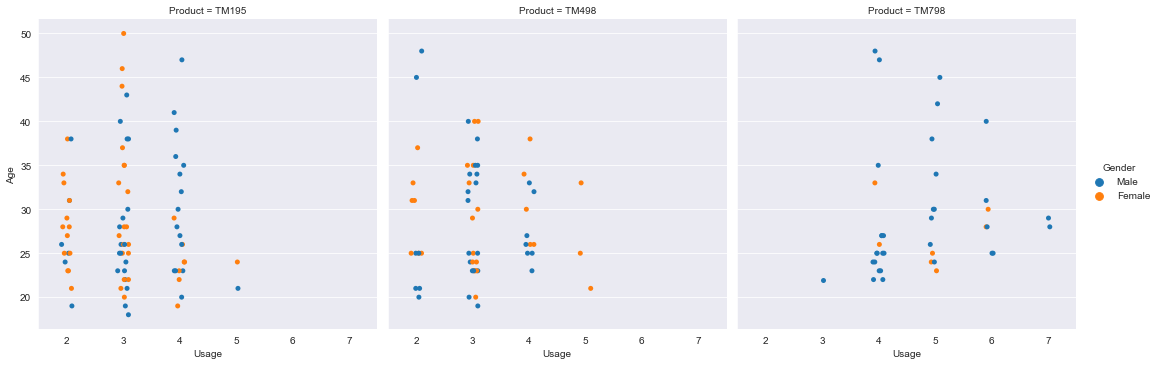

In [27]:
sns.catplot(x="Usage",y="Age",col="Product",data=data, kind="strip", hue="Gender")

**Observations**
* The 3 female users above 40 years of age own TM195.
* Higher usage above level 5 is achieved in TM798.

### Fitness by Age

<AxesSubplot:xlabel='Fitness', ylabel='Age'>

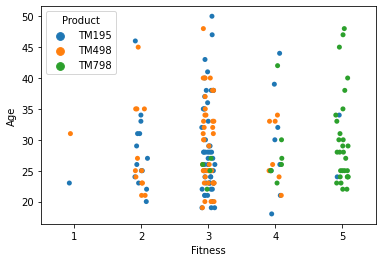

In [84]:
sns.stripplot(x='Fitness',y='Age',hue='Product',data=data)

**Observations**
* Fitness is higher for users below 40.
* People using TM798 are able to acheive highest level of fitness.

### Marital Status with Product

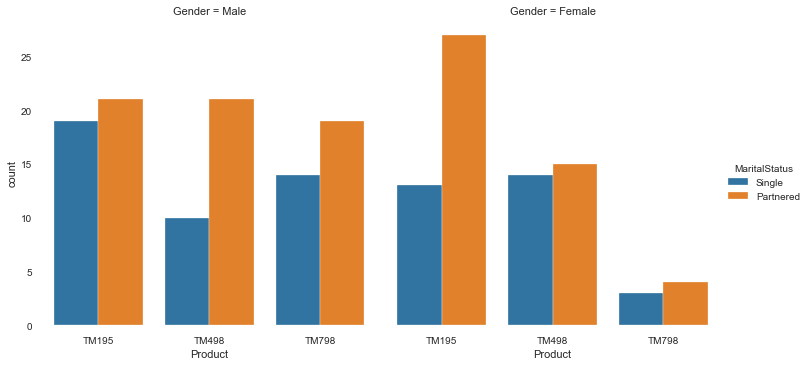

In [44]:
sns.catplot(hue="MaritalStatus",x="Product",col="Gender",data=data,kind="count")

**Observations**
* Partnered people use the products more than singles.
* Higher number of Partnered females use TM195.

### Usage based on Marital Status

<AxesSubplot:xlabel='MaritalStatus', ylabel='Usage'>

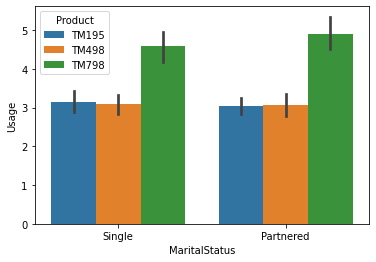

In [26]:
sns.barplot(x='MaritalStatus',y='Usage',hue='Product',data=data)

**Observations**
* Single or Partnered, higher usage is acheived with TM798.

### Effects of Education on Usage and Fitness

<AxesSubplot:xlabel='Usage', ylabel='Education'>

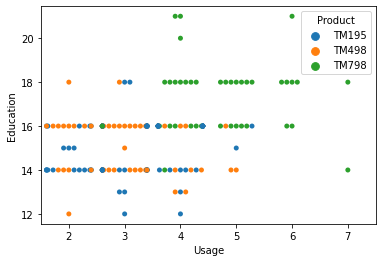

In [77]:
sns.swarmplot(y='Education',x='Usage',hue='Product',data=data)

**Observations**
* Users with Education level 16 and more use TM798.
* Their usage level is also 4 and above.
* This means that TM798 is more complex to operate but once learnt the product can be used very often.

<AxesSubplot:xlabel='Fitness', ylabel='Education'>

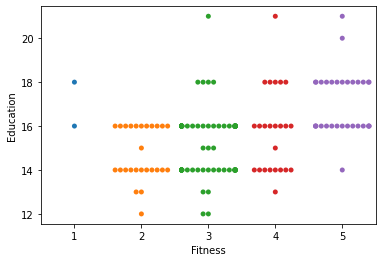

In [40]:
sns.swarmplot(y='Education',x='Fitness',data=data)

**Observations**
* People with higher education are being more fit.

### Analysis of Miles with other variables

#### Age vs Miles

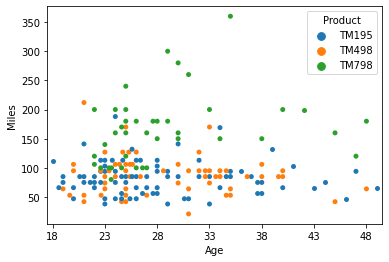

In [38]:
sns.set_context(context=None, font_scale=2)

ax=sns.swarmplot(x='Age',y='Miles',hue="Product",data=data)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.set_xlim(10,50)

**Observations**
* Younger age group (below 35 years) run more miles (above 200 miles).


#### Usage vs Miles

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

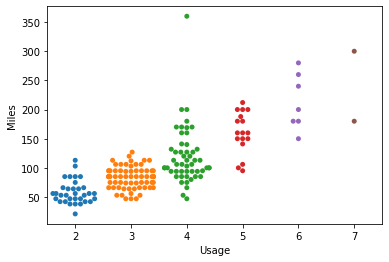

In [31]:
sns.swarmplot(x='Usage',y='Miles',data=data)

**Observations**
* As expected, as Usage increases, Miles increases.

#### Fitness vs Miles

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

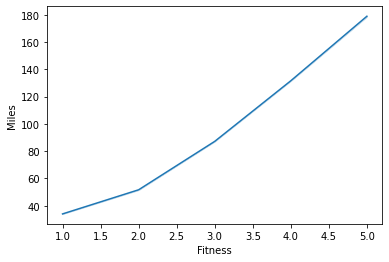

In [36]:
sns.lineplot(x='Fitness',y='Miles',data=data, ci=0)

Users who run more are more fit

#### Product vs Miles

<AxesSubplot:xlabel='Product', ylabel='Miles'>

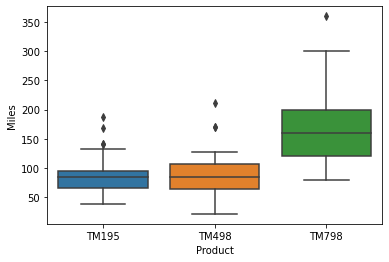

In [32]:
sns.boxplot(x='Product',y='Miles',data=data)

**Observations**
* More than 200 miles is achieved only by TM798.

### Miles with respect to Usage, Fitness and Products

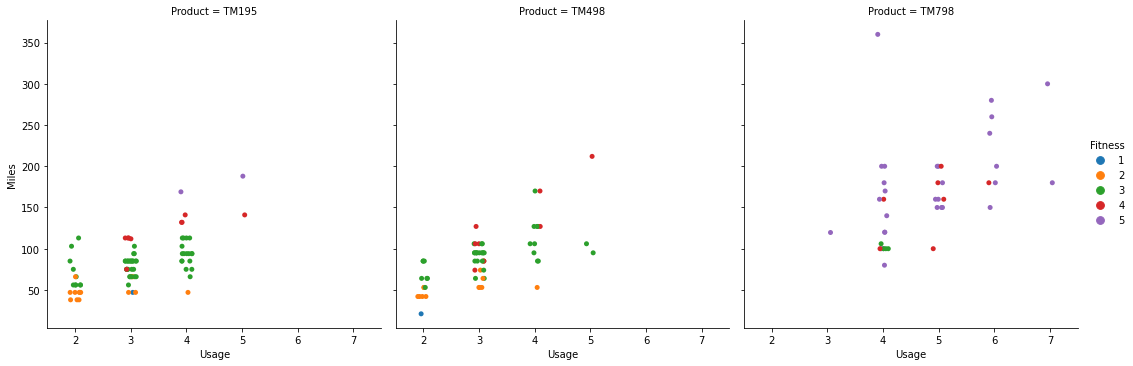

In [100]:
sns.catplot(y="Miles",x="Usage",hue="Fitness",col="Product",data=data,kind="strip")

**Observations**
* As seen in the heat map, With increasing usage, miles and fitness also increase.
* Higher usage and miles is achieved using TM798 only.

### Analysis of Income

#### Age vs Income

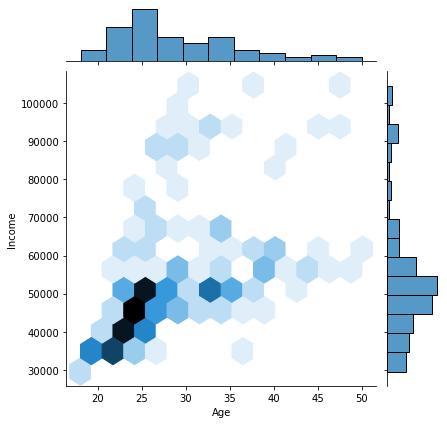

In [140]:
sns.jointplot(x=data["Age"],y=data["Income"],kind="hex")

**Observations**
* Majority of the buyers are less than 35 years with income less than 70,000.

#### Income based on Gender and the Products bought

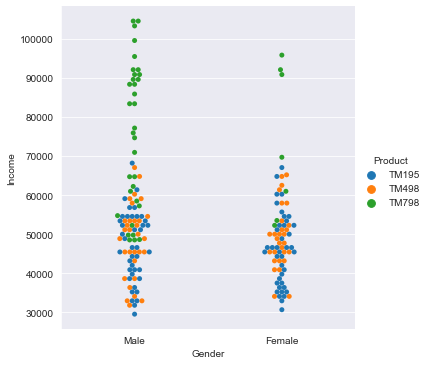

In [28]:
sns.catplot(x="Gender",y="Income",hue="Product",data=data,kind="swarm")

**Observations**
* Females' income are less than 70,000. That is why TM798 has more male users than female users as it is expensive and females don't earn enough to buy TM798.

#### Effect of Income on Product

<AxesSubplot:xlabel='Product', ylabel='Income'>

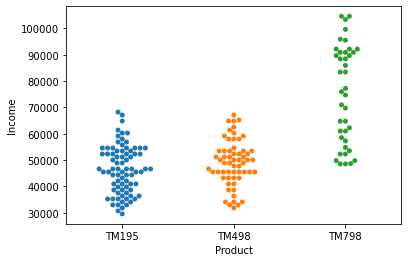

In [75]:
sns.swarmplot(x='Product',y='Income',data=data)

* TM798 is bought by people with income more than 50,000 which means it is expensive while TM195 and TM498 are more affordable.

#### Effect of Education on Income

<AxesSubplot:xlabel='Education', ylabel='Income'>

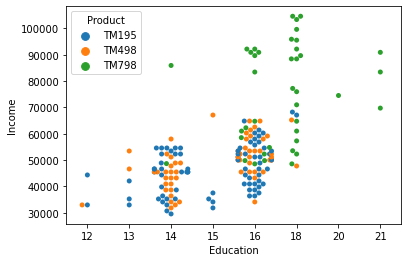

In [16]:
sns.swarmplot(y='Income',x='Education',hue="Product",data=data)

**Observations**
* As per the heat map, people with higher education earn more.


From the above analysis we can come up with the following profiles for each product.

**Customer Profile for TM195:**
* Age: 18-50
* Gender: Male/Female
* Education: 12-18
* Marital Status: Single/Partnered
* Usage: 2-5
* Fitness: 1-5
* Income:30,000-70,000
* Miles: 21-200

**Customer Profile for TM498:**
* Age: 18-50
* Gender: Male/Female
* Education: 12-18
* Marital Status: Single/Partnered
* Usage: 2-5
* Fitness: 1-4
* Income:30,000-70,000
* Miles: 21-250

**Customer Profile for TM798:**
* Age: 20-50
* Gender: Male/Female
* Education: 16-21
* Marital Status: Single/Partnered
* Usage: 3-7
* Fitness: 3-5
* Income:50,000-100,000
* Miles: 100-350





### Pandas profiling

In [45]:
from pandas_profiling import ProfileReport
# Use the original dataframe, so that original features are considered
prof = ProfileReport(data)
# to view report created by pandas profile
prof

# Conclusion and Recommendation

## Conclusion

1. Most of the users are below age 40.
2. Usage is higher in ages below 35 .
3. Partnerd people use treadmills more than singles.
4. More than 200 miles is run by ages 35 and below.
3. Both male and females use TM195 and TM498 equally. TM798 is bought more by males.
4. Higher Usage, Fitness and Miles is achieved by TM798.
5. People with higher education and income buy TM798.


## Recommendations

1. Usability of Products TM195 and TM498 need to be redefined so that they can be used more often.
2. TM798 should be more easier to operate and control.
3. Affordability  of TM798 should be increased by reducing its price.

## Further Analysis

With more information regarding the price and product features, analysis of what features the users are opting for under what price range can help to determine future versions of treadmills to be made so that users will be able to increase their usage and fitness levels.